# Loan Prediction  

In [1]:
# importing the necessary library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
%matplotlib inline 

In [2]:
# ignoring the unnecessary warnings 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# loading the data set

df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Exploration  

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### lets see the loan taken by the male and feamle  

In [5]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [6]:
cat_feature = df.select_dtypes('O').columns 
num_feature = df.select_dtypes(['float64', 'int64']).columns 

In [7]:
cat_feature

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
num_feature

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### let's see the behaviour of independent features with the dependent features

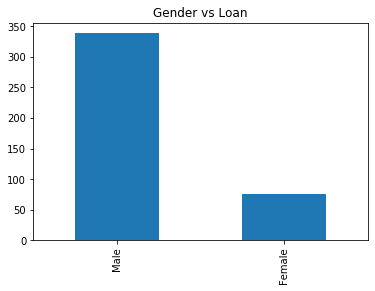

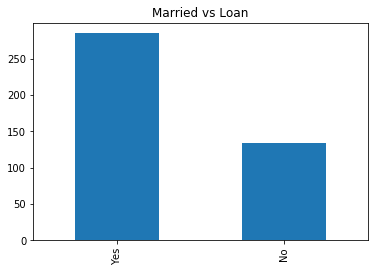

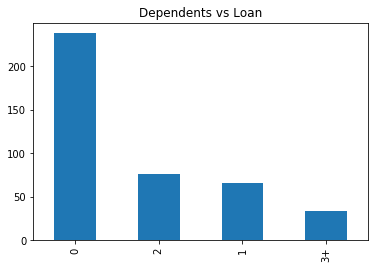

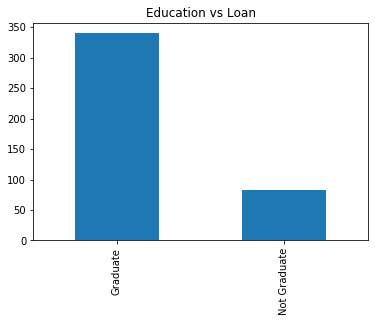

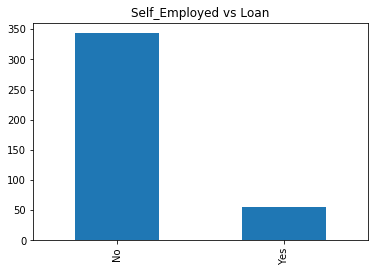

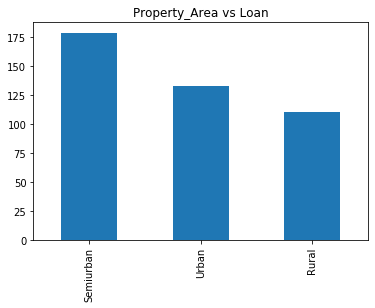

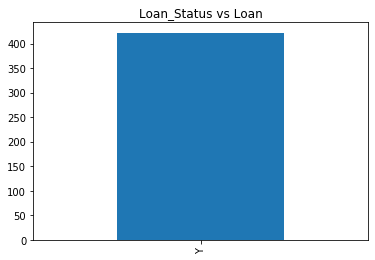

In [9]:
for feature in [x for x in cat_feature if 'ID' not in x ]:
    df[df['Loan_Status'] == 'Y'][feature].value_counts().plot(kind = 'bar')
    plt.title(feature + ' vs Loan' )
    plt.show()

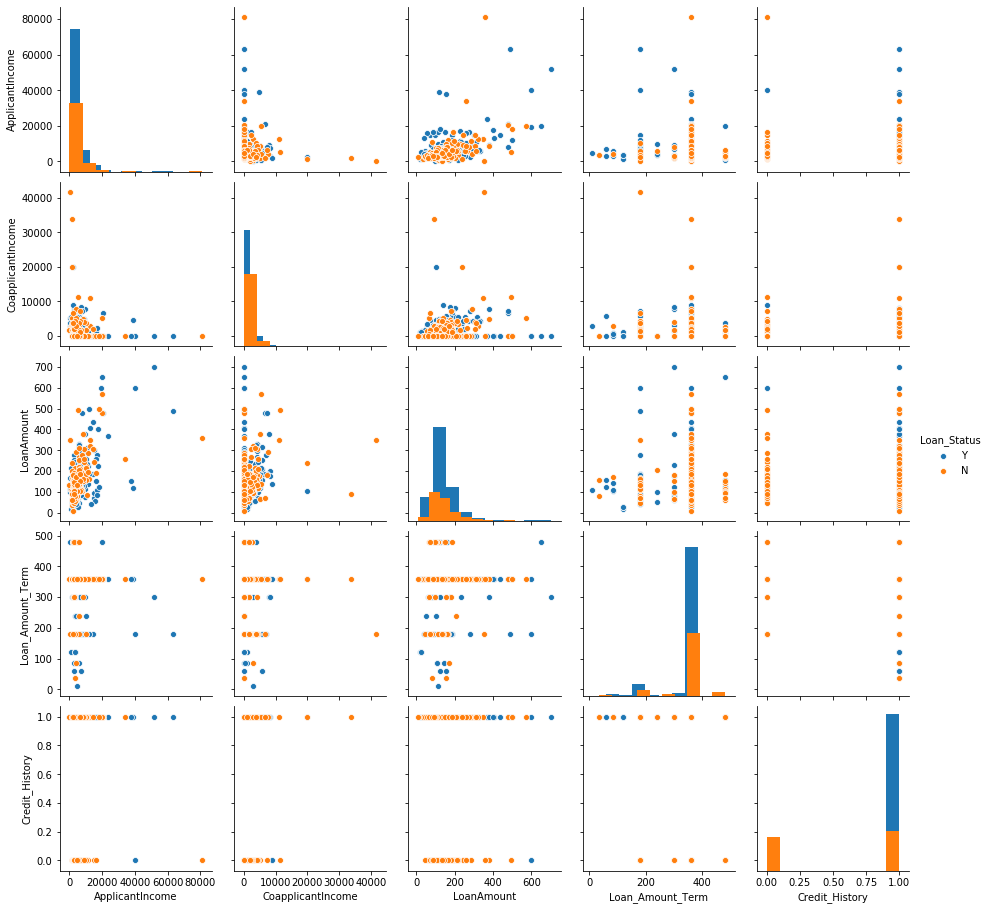

In [10]:
# relation between numeric features and sale price 


sns.pairplot(df, x_vars=num_feature, y_vars = num_feature, hue = 'Loan_Status', diag_kind='hist' )
plt.show()

In [11]:
conitnuous_features = [feature for feature in num_feature if len(df[feature].unique()) > 30]
conitnuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

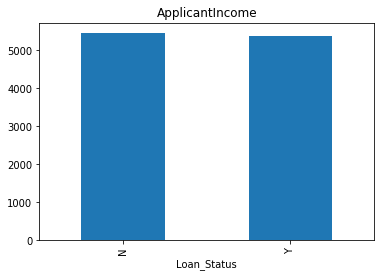

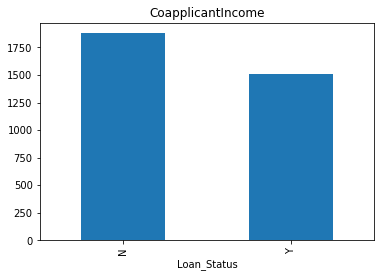

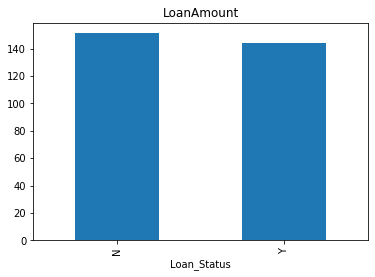

In [12]:
for feature in conitnuous_features:
    df.groupby('Loan_Status')[feature].mean().plot(kind = 'bar')
    plt.title(feature)
    plt.show()

In [13]:
# let's see the relation between loan status and descrete featurees

descrete_features = [feature for feature in num_feature if feature not in conitnuous_features]
descrete_features

['Loan_Amount_Term', 'Credit_History']

In [14]:
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

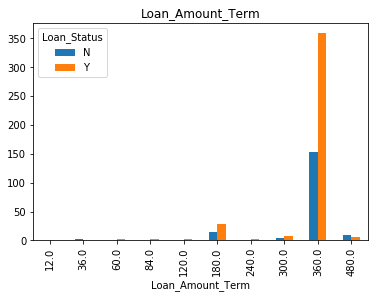

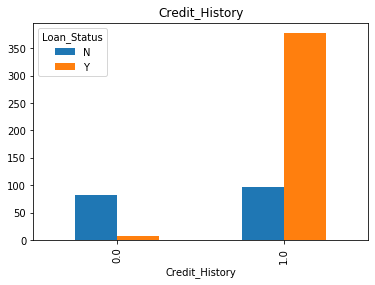

In [15]:
for feature in descrete_features:
    df.groupby(feature)['Loan_Status'].value_counts().unstack().plot(kind = 'bar')
    plt.title(feature)
    plt.show()

#### distribution of the data  

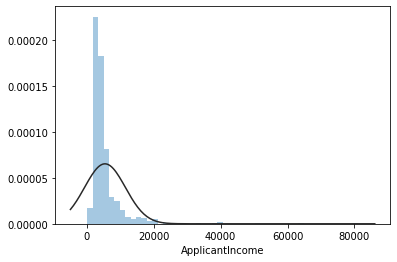

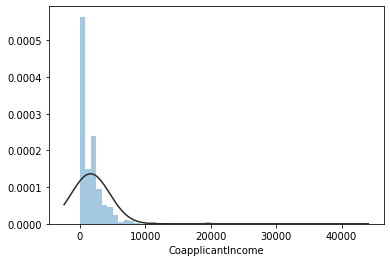

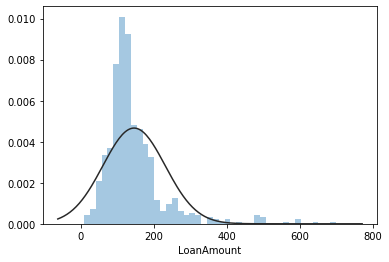

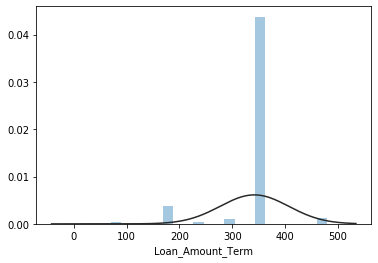

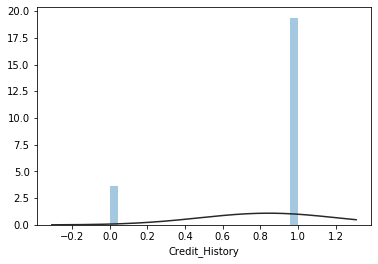

In [16]:
for feature in num_feature:
    sns.distplot(df[feature], kde = False, fit = stats.norm )
    plt.show()

# Nan  

In [17]:
df3 = df.copy()

In [18]:
cat_feature_nan = df[cat_feature].isna().sum()[df[cat_feature].isna().sum() > 0].keys()
num_feature_nan = df[num_feature].isna().sum()[df[num_feature].isna().sum() > 0].keys()

In [19]:
cat_feature_nan

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [20]:
num_feature_nan

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [21]:
for feature in cat_feature_nan:
    df3[feature] = df3[feature].fillna(df3[feature].mode()[0])

In [22]:
for feature in num_feature_nan:
    df3[feature] = df3[feature].fillna(df3[feature].mean())

In [23]:
df3.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier detection and removal  

In [24]:
df3.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


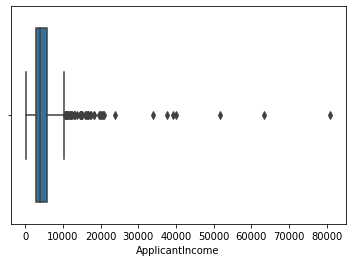

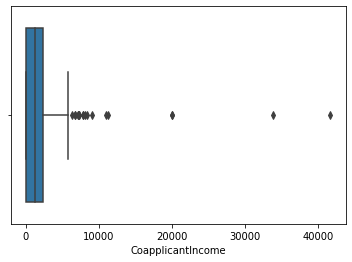

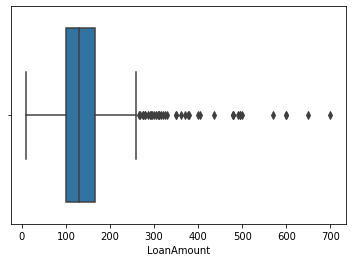

In [26]:
for feature in conitnuous_features:
    sns.boxplot(df3[feature])
    plt.show()

In [29]:
df4 = df3[~(df3['ApplicantIncome'] > 20000)]

In [31]:
df5 = df4[~(df4['CoapplicantIncome'] > 10000)]

In [33]:
df6 = df5[~(df5['LoanAmount'] > 300)]

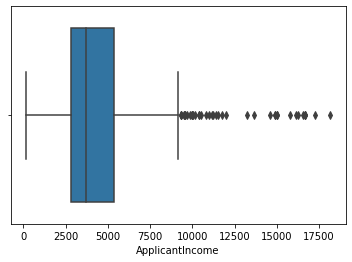

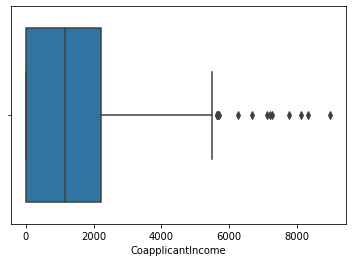

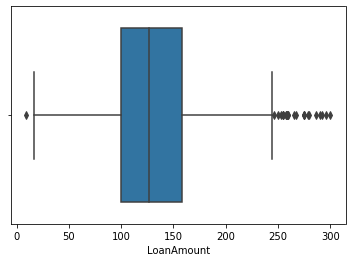

In [34]:
for feature in conitnuous_features:
    sns.boxplot(df6[feature])
    plt.show()

In [36]:
df6.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [38]:
def remove_outliers_from_column(data, column):
    df = data.copy()
    
    df[column] = np.log1p(df[column])
    df[column + '_z_score'] = (df[column] - df[column].mean())/df[column].std()
    
    clean = df[(df[column + '_z_score'] < 3) & (df[column + '_z_score']  > -3)]
    
    return clean
    

In [41]:
df7 = remove_outliers_from_column(df6, 'ApplicantIncome')

In [43]:
df8 = remove_outliers_from_column(df7, 'CoapplicantIncome')

In [45]:
df9 = remove_outliers_from_column(df8, 'LoanAmount')

In [49]:
df9.drop(['ApplicantIncome_z_score', 'CoapplicantIncome_z_score', 'LoanAmount_z_score'], axis = 1, inplace = True)

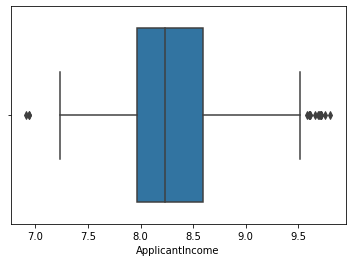

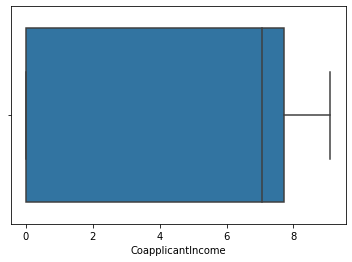

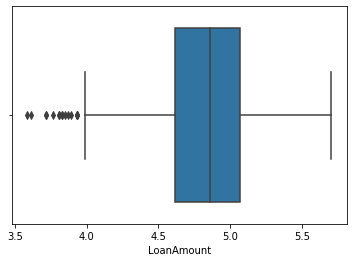

In [51]:
for feature in conitnuous_features:
    sns.boxplot(df9[feature])
    plt.show()

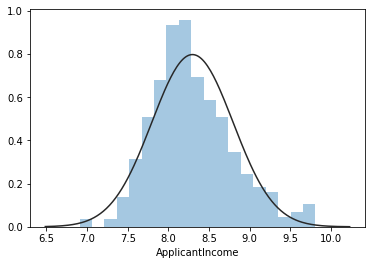

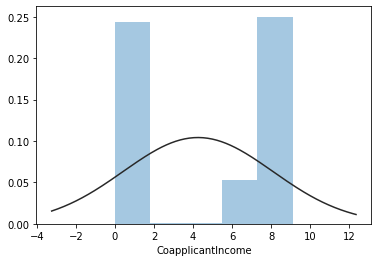

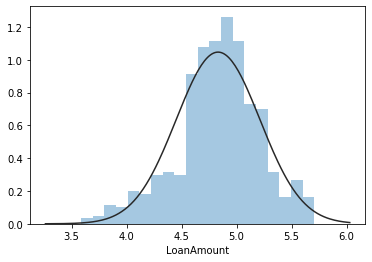

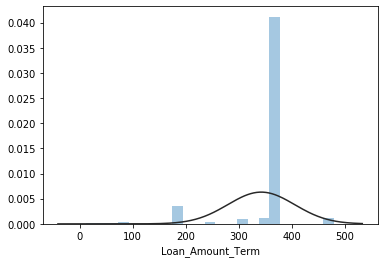

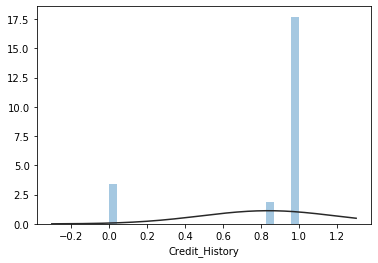

In [53]:
for feature in num_feature:
    sns.distplot(df9[feature], kde = False, fit = stats.norm )
    plt.show()

In [77]:
df9.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y


# encdoing  

In [102]:

X_train = df9.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y_train = df9[['Loan_Status']]

In [79]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban


In [80]:
dummies = pd.get_dummies(X_train.select_dtypes('O'), drop_first=True)
dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


In [81]:
X_train = pd.concat([X_train, dummies], axis = 1)

In [82]:
X_train.drop(X_train.select_dtypes('O').columns, axis = 1, inplace = True )

In [83]:
X_train.isna().sum().sum()

0

In [84]:
X_train.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.993232,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1


# scaling  

In [85]:
scaler = MinMaxScaler()

In [89]:
X_scale = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [103]:
y_scale = y_train.copy()

In [90]:
X_not_scale = X_train.copy()

In [104]:
y_not_scale = y_train.copy()

In [105]:
X_scale.shape, y_scale.shape 

((567, 14), (567, 1))

In [141]:
y_scale['Loan_Status'] = y_scale['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)

In [142]:
y_not_scale['Loan_Status'] = y_not_scale['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)

In [143]:
y_scale.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [144]:
y_not_scale.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# model creation  

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [146]:
X, X_, y, y_ = train_test_split(X_scale, y_scale, test_size = 0.75)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size = 0.75)

In [147]:
model_list = [
    LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), 
    BaggingClassifier(), SVC()
]

model_name = [
    'LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier',
    'BaggingClassifier', 'SVC'
]

In [159]:
def get_result(model_list, X_train, X_test, y_train, y_test ):
    
    precesion = []
    recall = []
    f1 = []
    
    for model in model_list:
        m = model.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        precesion.append(precision_score(y_test, y_pred, ))
        recall.append(recall_score(y_test, y_pred,  ))
        f1.append(f1_score(y_test, y_pred,   ))
    
    return pd.DataFrame(
    {
        'model' : model_name, 
        'precesion' : precesion, 
        'recall' : recall, 
        'f1_score' : f1
    })

In [187]:
non_scale_score = get_result(model_list, X_train, X_test, y_train, y_test)

In [188]:
scale_score = get_result(model_list, X, X_, y, y_)

In [189]:
non_scale_score

,model,precesion,recall,f1_score
0,LogisticRegression,0.806818,0.969283,0.880620
1,KNeighborsClassifier,0.746631,0.945392,0.834337
2,RandomForestClassifier,0.804878,0.901024,0.850242
3,ExtraTreesClassifier,0.825658,0.856655,0.840871
4,GradientBoostingClassifier,0.796353,0.894198,0.842444
5,BaggingClassifier,0.806557,0.839590,0.822742
6,SVC,0.807263,0.986348,0.887865


In [190]:
scale_score

,model,precesion,recall,f1_score
0,LogisticRegression,0.803324,0.973154,0.880121
1,KNeighborsClassifier,0.755319,0.953020,0.842730
2,RandomForestClassifier,0.808442,0.835570,0.821782
3,ExtraTreesClassifier,0.807692,0.845638,0.826230
4,GradientBoostingClassifier,0.807571,0.859060,0.832520
5,BaggingClassifier,0.800676,0.795302,0.797980
6,SVC,0.805479,0.986577,0.886878


In [193]:
scale_lr  = LogisticRegression().fit(X, y)

In [194]:
non_scale_lr = LogisticRegression().fit(X_train, y_train)

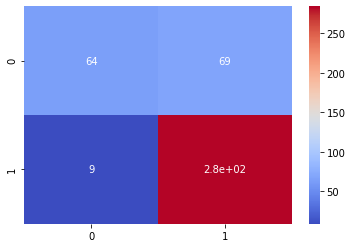

In [195]:
sns.heatmap(confusion_matrix(y_test, scale_lr.predict(X_test)), annot = True, cmap = 'coolwarm')

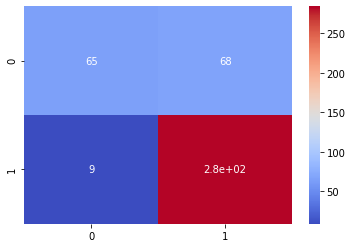

In [196]:
sns.heatmap(confusion_matrix(y_test, non_scale_lr.predict(X_test)), annot = True, cmap = 'coolwarm')